In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=5ab4d0c68fd69ffc82c11c7706c18191


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [17]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [18]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # print(f"{i} {city}")
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 49 | constitucion
Processing Record 2 of Set 49 | banmankhi
Processing Record 3 of Set 49 | huarmey
Processing Record 4 of Set 49 | khatanga
Processing Record 5 of Set 49 | port moresby
Processing Record 6 of Set 49 | sorvag
City not found. Skipping...
Processing Record 7 of Set 49 | cape town
Processing Record 8 of Set 49 | tuktoyaktuk
Processing Record 9 of Set 49 | puerto ayora
Processing Record 10 of Set 49 | verkhnyaya sysert
Processing Record 11 of Set 49 | kapaa
Processing Record 12 of Set 49 | avarua
Processing Record 13 of Set 49 | longkou
Processing Record 14 of Set 49 | toledo
Processing Record 15 of Set 49 | dingle
Processing Record 16 of Set 49 | coquimbo
Processing Record 17 of Set 49 | ushuaia
Processing Record 18 of Set 49 | yellowknife
Processing Record 19 of Set 49 | vredendal
Processing Record 20 of Set 49 | bilma
Processing Record 21 of Set 49 | marcona
City not found. Skipping...
Processing Record 22 of Set 49 | san quintin
Processing Rec

Processing Record 34 of Set 52 | elat
Processing Record 35 of Set 52 | korla
Processing Record 36 of Set 52 | bartica
Processing Record 37 of Set 52 | alta floresta
Processing Record 38 of Set 52 | castro
Processing Record 39 of Set 52 | mahadday weyne
City not found. Skipping...
Processing Record 40 of Set 52 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 52 | lakes entrance
Processing Record 42 of Set 52 | beisfjord
Processing Record 43 of Set 52 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 52 | nikolskoye
Processing Record 45 of Set 52 | sinjah
City not found. Skipping...
Processing Record 46 of Set 52 | henties bay
Processing Record 47 of Set 52 | hobyo
Processing Record 48 of Set 52 | goderich
Processing Record 49 of Set 52 | isiro
Processing Record 50 of Set 52 | merrill
Processing Record 1 of Set 53 | taldan
Processing Record 2 of Set 53 | agde
Processing Record 3 of Set 53 | karla
Processing Record 4 of Set 53 | samarai
Processing 

Processing Record 19 of Set 56 | redwater
Processing Record 20 of Set 56 | grindavik
Processing Record 21 of Set 56 | kieta
Processing Record 22 of Set 56 | krasnogorsk
Processing Record 23 of Set 56 | datong
Processing Record 24 of Set 56 | kesennuma
City not found. Skipping...
Processing Record 25 of Set 56 | aulla
Processing Record 26 of Set 56 | champerico
Processing Record 27 of Set 56 | poum
Processing Record 28 of Set 56 | port lincoln
Processing Record 29 of Set 56 | bucerias
Processing Record 30 of Set 56 | artyk
City not found. Skipping...
Processing Record 31 of Set 56 | epe
Processing Record 32 of Set 56 | bonavista
Processing Record 33 of Set 56 | garcia hernandez
Processing Record 34 of Set 56 | sangar
Processing Record 35 of Set 56 | upernavik
Processing Record 36 of Set 56 | sinnamary
Processing Record 37 of Set 56 | sungaipenuh
Processing Record 38 of Set 56 | jacareacanga
Processing Record 39 of Set 56 | mezen
Processing Record 40 of Set 56 | dikson
Processing Record 

Processing Record 7 of Set 60 | balkanabat
Processing Record 8 of Set 60 | dunyapur
Processing Record 9 of Set 60 | nitra
Processing Record 10 of Set 60 | san patricio
Processing Record 11 of Set 60 | todos santos
Processing Record 12 of Set 60 | knysna
Processing Record 13 of Set 60 | nishiwaki
Processing Record 14 of Set 60 | wagga wagga
Processing Record 15 of Set 60 | lima
Processing Record 16 of Set 60 | khormuj
City not found. Skipping...
Processing Record 17 of Set 60 | kushima
Processing Record 18 of Set 60 | pevek
Processing Record 19 of Set 60 | rock sound
Processing Record 20 of Set 60 | yichang
Processing Record 21 of Set 60 | rawson
Processing Record 22 of Set 60 | gemena
Processing Record 23 of Set 60 | sambo creek
Processing Record 24 of Set 60 | acapulco
Processing Record 25 of Set 60 | ucluelet
Processing Record 26 of Set 60 | ust-nera
Processing Record 27 of Set 60 | cayenne
Processing Record 28 of Set 60 | agadez
Processing Record 29 of Set 60 | maceio
Processing Rec

In [24]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Constitucion,-35.3333,-72.4167,53.26,87,100,11.07,CL,2021-12-02 00:53:13
1,Banmankhi,25.8833,87.1833,64.36,62,8,2.24,IN,2021-12-02 00:53:13
2,Huarmey,-10.0681,-78.1522,66.52,86,100,6.64,PE,2021-12-02 00:53:14
3,Khatanga,71.9667,102.5000,-38.29,100,92,1.28,RU,2021-12-02 00:53:15
4,Port Moresby,-9.4431,147.1797,85.42,74,40,5.75,PG,2021-12-02 00:53:15
5,Cape Town,-33.9258,18.4232,61.21,63,20,9.22,ZA,2021-12-02 00:53:16
6,Tuktoyaktuk,69.4541,-133.0374,-20.20,76,90,4.61,CA,2021-12-02 00:53:17
7,Puerto Ayora,-0.7393,-90.3518,69.57,86,52,9.75,EC,2021-12-02 00:53:18
8,Verkhnyaya Sysert,56.4372,60.7500,35.40,94,100,6.73,RU,2021-12-02 00:53:18
9,Kapaa,22.0752,-159.3190,80.92,71,40,5.01,US,2021-12-02 00:52:48


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [26]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

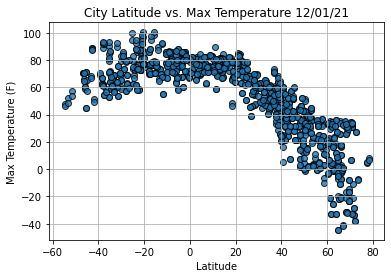

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

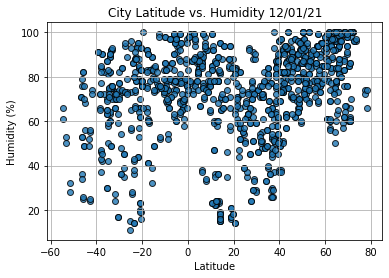

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

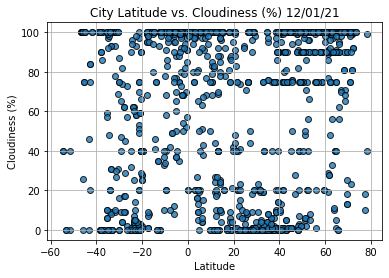

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

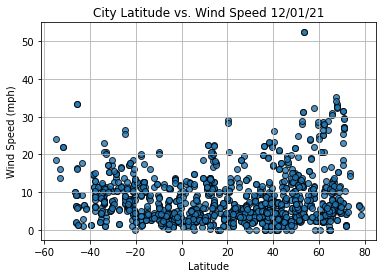

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()